In [102]:
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [103]:
# Set up the paths to the input directories
train_dir = "C:/Users/pc/OneDrive/Desktop/CS/semester6/Machine Learning (CS363)/new project/Face_splittedData/train"
test_dir = "C:/Users/pc/OneDrive/Desktop/CS/semester6/Machine Learning (CS363)/new project/Face_splittedData/test"

# Set up the image dimensions
img_height = 224
img_width = 224


# Define a function to preprocess the images
def preprocess_images(data_dir):
    training_data = []
    X = []
    y = []
    
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                if file_name.endswith('.jpg'):
                    img_path = os.path.join(class_dir, file_name)
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, (img_height, img_width))
                    training_data.append([img,class_name])
                    
    import random
    random.shuffle(training_data)
#     for sample in training_data[:10]:
#         print(sample[1]) 
    
    for features,label in training_data:
        X.append(features)
        y.append(label)
    
    X = np.array(X)
    y = np.array(y)
    
    
    
    # Normalize the data using mean and standard deviation and we applied the normalization before the oversamling to prevent data leakage
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(X.shape[0], -1))
    X = X.reshape(-1, img_height, img_width, 3)
    
    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X.reshape(X.shape[0], -1), y)
    X_resampled = X_resampled.reshape(-1, img_height, img_width, 3)
    
   
    
    
    # Perform label encoding on the target variable (labels)
    label_encoder = LabelEncoder()
    y_resampled = label_encoder.fit_transform(y_resampled)
    
    return X_resampled, y_resampled
    




In [104]:
# Preprocess the training data
train_X, train_y = preprocess_images(train_dir)

# Preprocess the testing data
test_X, test_y = preprocess_images(test_dir)

In [105]:
#apply flatten to convert 3-dimensional to 2-dimension 
train_X_flat = np.array([img.flatten() for img in train_X])
test_X_flat = np.array([img.flatten() for img in test_X])

In [106]:
print("x train dimensions :",train_X_flat.shape)
print("x test dimensions: ",test_X_flat.shape)
print("y train dimensions :",train_y.shape)
print("y test dimensions :",test_y.shape)

for i in test_y[:10]:
        print(i)

x train dimensions : (1346, 150528)
x test dimensions:  (506, 150528)
y train dimensions : (1346,)
y test dimensions : (506,)
1
0
0
0
1
0
0
1
1
0


In [107]:
LogisticRegressionModel = LogisticRegression(solver='lbfgs',max_iter=200,random_state=42)
LogisticRegressionModel.fit(train_X_flat,train_y)

LogisticRegression(max_iter=200, random_state=42)

In [108]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(train_X_flat, train_y))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(test_X_flat, test_y))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iterations is : ' , LogisticRegressionModel.n_iter_ )

LogisticRegressionModel Train Score is :  1.0
LogisticRegressionModel Test Score is :  1.0
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iterations is :  [99]


In [109]:
y_pred = LogisticRegressionModel.predict(test_X_flat)
y_pred_prob = LogisticRegressionModel.predict_proba(test_X_flat)
print('Predicted Value for LogisticRegression is : ', y_pred[:10])
print('Prediction probabilities Value for LogisticRegressionModel is : \n', y_pred_prob[:10])

Predicted Value for LogisticRegression is :  [1 0 0 0 1 0 0 1 1 0]
Prediction probabilities Value for LogisticRegressionModel is : 
 [[8.60680416e-11 1.00000000e+00]
 [1.00000000e+00 1.69301618e-11]
 [9.99999956e-01 4.41475023e-08]
 [1.00000000e+00 1.64922570e-12]
 [3.42387785e-09 9.99999997e-01]
 [9.99998953e-01 1.04696467e-06]
 [1.00000000e+00 2.88549526e-11]
 [3.06927284e-09 9.99999997e-01]
 [2.56922528e-09 9.99999997e-01]
 [9.99990716e-01 9.28401675e-06]]


In [110]:
#evaluation_model
accuracy = accuracy_score(test_y, y_pred)
print('Accuracy:', accuracy)
recall = recall_score(test_y, y_pred)
print('Recall:', recall)
precision = precision_score(test_y, y_pred)
print('Precision:', precision)
f1 = f1_score(test_y,y_pred)
print('F1_score:', f1)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1_score: 1.0


In [111]:
cm = confusion_matrix(test_y,y_pred)
print('Confusion Matrix is : \n', cm)

Confusion Matrix is : 
 [[253   0]
 [  0 253]]


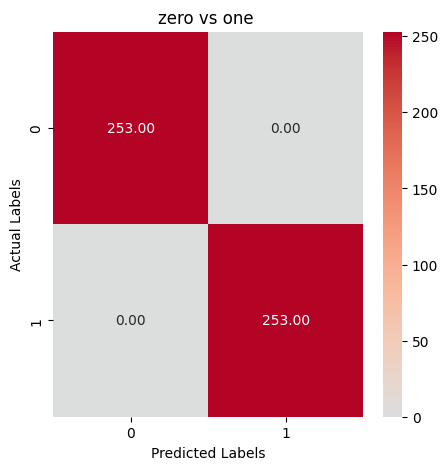

In [112]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, center= True, cmap="coolwarm", annot=True, fmt='.2f',annot_kws={'size': 10})
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("zero vs one ")
plt.show()